<a href="https://colab.research.google.com/github/najnin26/ML_Algo_Implement/blob/main/Random%20Forest/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Fetching Dataset***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import cv2

In [ ]:
digits=pd.read_csv('/content/drive/MyDrive/ML And QML/SVM/train.csv')

In [ ]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
four=digits.iloc[3,1:]
four.shape

(784,)

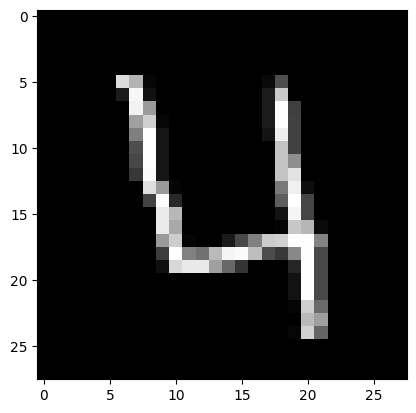

In [ ]:
four=four.values.reshape(28,28)
plt.imshow(four,cmap='gray')

# ***visualise the array***

In [ ]:
print(four[5:-5,5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [ ]:

# Summarise the counts of 'label' to see how many labels of each digit are present
digits.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [ ]:
# Summarise count in terms of percentage
100*(round(digits.label.astype('category').value_counts()/len(digits.index),4))

label
1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: count, dtype: float64

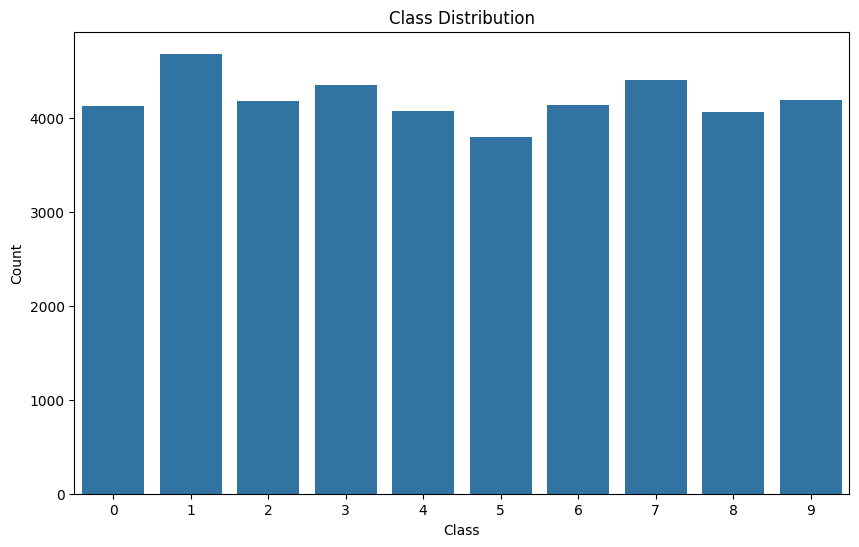

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=digits)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
# average values/distributions of features
description = digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# ***Data Preparation for Model Building***

In [ ]:
# Creating training and test sets
# Splitting the data into train and test
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


# ***Random Forest(Gini)***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier=RandomForestClassifier(criterion='gini')
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
pred[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6])

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy=metrics.accuracy_score(y_test,pred)
print(accuracy)

0.9303174603174603


In [ ]:
confusion=confusion_matrix(y_test,pred)
confusion

array([[3632,    0,    3,    3,    2,   13,   33,    4,   25,    0],
       [   0, 4108,   12,   22,    9,    2,   10,   14,    4,    4],
       [  27,   17, 3445,   53,   52,   10,   65,   74,   40,    7],
       [  15,   23,   96, 3473,    9,   91,   20,   46,   75,   52],
       [   5,    6,   11,    1, 3441,    3,   43,   11,   17,  164],
       [  52,   36,    5,  110,   21, 3040,   59,   14,   40,   41],
       [  42,   15,    9,    0,   14,   22, 3572,    3,   16,    0],
       [   9,   22,   68,    8,   28,    1,    0, 3724,   15,   79],
       [   7,   47,   29,  119,   29,   59,   21,   13, 3272,   69],
       [  30,   15,   16,   49,   82,   16,    7,   76,   28, 3459]])

In [ ]:
class_report=metrics.classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3715
           1       0.96      0.98      0.97      4185
           2       0.93      0.91      0.92      3790
           3       0.90      0.89      0.90      3900
           4       0.93      0.93      0.93      3702
           5       0.93      0.89      0.91      3418
           6       0.93      0.97      0.95      3693
           7       0.94      0.94      0.94      3954
           8       0.93      0.89      0.91      3665
           9       0.89      0.92      0.90      3778

    accuracy                           0.93     37800
   macro avg       0.93      0.93      0.93     37800
weighted avg       0.93      0.93      0.93     37800



# ***Random Forest(Entropy)***

In [ ]:
classifier=RandomForestClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
pred[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6])

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy=metrics.accuracy_score(y_test,pred)
print(accuracy)

0.9302910052910053


In [ ]:
confusion=confusion_matrix(y_test,pred)
confusion

array([[3633,    0,    6,    3,    3,   10,   30,    5,   25,    0],
       [   0, 4110,   11,   21,    4,    4,    6,   12,   11,    6],
       [  31,   20, 3455,   41,   39,    8,   65,   78,   42,   11],
       [  16,   26,   99, 3471,   12,   96,   21,   50,   72,   37],
       [   4,   10,   12,    3, 3402,    0,   60,   11,   17,  183],
       [  39,   38,    6,  123,   31, 3052,   55,    9,   35,   30],
       [  41,   15,   11,    0,   18,   27, 3559,    5,   17,    0],
       [   6,   30,   64,    8,   34,    2,    1, 3725,   12,   72],
       [  11,   39,   31,   91,   25,   45,   28,   12, 3331,   52],
       [  27,   16,   13,   56,   94,   17,    9,   87,   32, 3427]])

In [ ]:
class_report=metrics.classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3715
           1       0.95      0.98      0.97      4185
           2       0.93      0.91      0.92      3790
           3       0.91      0.89      0.90      3900
           4       0.93      0.92      0.92      3702
           5       0.94      0.89      0.91      3418
           6       0.93      0.96      0.95      3693
           7       0.93      0.94      0.94      3954
           8       0.93      0.91      0.92      3665
           9       0.90      0.91      0.90      3778

    accuracy                           0.93     37800
   macro avg       0.93      0.93      0.93     37800
weighted avg       0.93      0.93      0.93     37800



## ***Grid Search Cross-Validation***

In [ ]:
import random
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[10,20,30,40,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

dt=RandomForestClassifier(random_state=101)

clf=GridSearchCV(dt,param_grid,scoring='accuracy',return_train_score=True)

In [ ]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [ ]:
cv_results=pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.826872,0.184187,0.034874,0.004270,gini,10,1,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.927381,...,0.921190,0.005184,31,0.994940,0.996429,0.995536,0.995238,0.996131,0.995655,0.000552
1,1.871978,0.288389,0.034138,0.004044,gini,10,1,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.919048,...,0.919048,0.003912,44,0.993750,0.995238,0.994345,0.994048,0.995238,0.994524,0.000613
2,1.890550,0.266679,0.034542,0.004123,gini,10,1,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.923810,...,0.920238,0.005216,36,0.988393,0.990476,0.990476,0.989286,0.989583,0.989643,0.000785
3,1.779794,0.253252,0.033224,0.004046,gini,10,2,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.916667,...,0.919286,0.006317,39,0.993155,0.994643,0.993452,0.993452,0.994643,0.993869,0.000641
4,1.900457,0.306149,0.032553,0.002645,gini,10,2,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.920238,...,0.918333,0.005664,49,0.991964,0.993750,0.993155,0.992560,0.993452,0.992976,0.000641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2.908605,0.521498,0.035098,0.002886,entropy,None,2,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.930952,...,0.923810,0.007825,17,0.998214,0.998810,0.998512,0.998512,0.999107,0.998631,0.000304
86,2.808772,0.522661,0.035239,0.004901,entropy,None,2,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.923810,...,0.916190,0.009718,78,0.992262,0.993155,0.994048,0.992262,0.992857,0.992917,0.000663
87,2.743598,0.460185,0.034994,0.005039,entropy,None,4,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.922619,...,0.916667,0.007103,65,0.990476,0.992262,0.990179,0.991369,0.991071,0.991071,0.000729
88,2.725750,0.470683,0.032222,0.002421,entropy,None,4,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.922619,...,0.916667,0.007103,65,0.990476,0.992262,0.990179,0.991369,0.991071,0.991071,0.000729


In [ ]:
best_param_dt=clf.best_params_
best_accuracy_dt=clf.best_score_
print("Best parameters for Decision Tree:", best_param_dt)
print("Best cross-validation accuracy for Decision Tree:", best_accuracy_dt)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation accuracy for Decision Tree: 0.9266666666666665


# ***Best Model***

In [ ]:
param_grid={
    'criterion':['gini'],
    'max_depth':[30],
    'min_samples_split':[2],
    'min_samples_leaf':[10]
}

dt=RandomForestClassifier(random_state=101)

clf=GridSearchCV(dt,param_grid,scoring='accuracy',return_train_score=True)

In [ ]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini'], 'max_depth': [30],
                         'min_samples_leaf': [10], 'min_samples_split': [2]},
             return_train_score=True, scoring='accuracy')

In [ ]:
pred=clf.predict(x_test)

In [ ]:
confusion=metrics.confusion_matrix(y_true=y_test,y_pred=pred)

In [ ]:
test_accuracy=metrics.accuracy_score(y_true=y_test,y_pred=pred)
print(test_accuracy)

0.9091269841269841


In [ ]:
print(confusion)

[[3604    0    8    3    2   10   39    7   42    0]
 [   0 4090   12   26    5    4   10   15   18    5]
 [  36   29 3354   59   49   13   85   93   53   19]
 [  20   39   88 3414   14   95   21   53   96   60]
 [   8    9   13    3 3281    2   82   13   24  267]
 [  66   65    8  169   40 2885   68   32   48   37]
 [  63   22   13    1   25   29 3515   10   15    0]
 [   7   40   79    8   41    0    1 3656   19  103]
 [   8   71   21  144   28   55   41   15 3198   84]
 [  34   21   19   54   91   22   11  126   32 3368]]
